
# Project: Investigate a Dataset (Factors of No-show in medical scheduled appointments)

Bashayer Alshehri (3 May, 2020)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploring Data</a></li>
<li><a href="#Questions">Questions</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I aim to investigate the factors that affect the medical scheduled appointments attendance in Brazil. The Dataset that I'm trying to explore and investigate includes some features about patients plus whether the patient shows up to the appointments or not.The Data analysis in this project is an attempt to highlight some Trends that may or may not cause patients to attend.

You can find the original problem and the Dataset from here : https://www.kaggle.com/joniarroba/noshowappointments


In [1]:
# import some important library for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


In [2]:
#load the dataset to a dataframe
df_showUp = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#an overview of the data
df_showUp.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


it seems that there's no time defined in Appointment Day, all the records have (00:00:00) as time,We cannot analyze whether time is one of the factors affecting patient show up.

In [3]:
#Learn the shape of the dataset
df_showUp.shape

(110527, 14)

In this Dataset there are about 110527 records (Rows) and 14 Features (Columns)

In [4]:
##Learn the Features and its Data Type.
df_showUp.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

- The PatientId of type 'float', should be of type 'String'.
- The ScheduledDay and AppointmentDay are of type 'String', should be 'Date'.

In [5]:
#Learn about how much missing value in each Feature
df_showUp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There's no missing values in the Features.

In [6]:
# Convert PatientId from type 'float' to be of type 'String'.
df_showUp['PatientId']=df_showUp['PatientId'].astype(str)

In [7]:
# Convert ScheduledDay and AppointmentDay from type 'String' to be of type 'Date'.
df_showUp['ScheduledDay']=df_showUp['ScheduledDay'].astype('datetime64[ns]')
df_showUp['ScheduledDay']=df_showUp['ScheduledDay'].dt.normalize()
df_showUp['AppointmentDay']=df_showUp['AppointmentDay'].astype('datetime64[ns]')

In [8]:
#Ensure that the data type has been fixed
df_showUp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(8), obje

The Datatypes are fixed ...

In [9]:
#check the unique values to explore the wrong value.
df_showUp['PatientId'].unique()

array(['29872499824296.0', '558997776694438.0', '4262962299951.0', ...,
       '72633149253362.0', '996997666245785.0', '15576631729893.0'],
      dtype=object)

I need to subtract the last two characters, it's coming from converting the PatientId to 'String' DataType.

In [10]:
#subtract the last two character from PatientId
df_showUp['PatientId']=df_showUp['PatientId'].str[:-2]

In [11]:
#check the unique values to explore the wrong value.
df_showUp['AppointmentID'].unique()

array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448],
      dtype=int64)

In [12]:
#check the unique values to explore the wrong value.
df_showUp['Gender'].unique()

array(['F', 'M'], dtype=object)

In [13]:
#check the unique values to explore the wrong value.
df_showUp['ScheduledDay'].unique()

array(['2016-04-29T00:00:00.000000000', '2016-04-27T00:00:00.000000000',
       '2016-04-26T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-04-25T00:00:00.000000000', '2016-04-20T00:00:00.000000000',
       '2016-03-31T00:00:00.000000000', '2016-04-19T00:00:00.000000000',
       '2016-04-06T00:00:00.000000000', '2016-04-18T00:00:00.000000000',
       '2016-04-11T00:00:00.000000000', '2016-04-12T00:00:00.000000000',
       '2016-04-15T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-04-05T00:00:00.000000000', '2016-04-08T00:00:00.000000000',
       '2016-04-14T00:00:00.000000000', '2016-04-13T00:00:00.000000000',
       '2016-04-07T00:00:00.000000000', '2016-03-17T00:00:00.000000000',
       '2016-03-30T00:00:00.000000000', '2016-03-29T00:00:00.000000000',
       '2016-03-18T00:00:00.000000000', '2016-03-28T00:00:00.000000000',
       '2016-03-04T00:00:00.000000000', '2016-03-15T00:00:00.000000000',
       '2016-03-14T00:00:00.000000000', '2016-03-21

In [14]:
#check the unique values to explore the wrong value.
df_showUp['AppointmentDay'].unique()

array(['2016-04-29T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-19T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-20T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-13T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-25T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-05-18T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-06-02T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000'], dtype='dat

In [15]:
#check the unique values to explore the wrong value.
df_showUp['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

It seems that there is a human error, I noticed that there is an age = '-1', let's check for more human errors in age feature.

In [16]:
#calculate how much age is < 0 to drop them later
df_showUp[df_showUp['Age']<0]['Age'].value_counts()

-1    1
Name: Age, dtype: int64

I need to remove this record with age = '-1'.

In [17]:
#remove record with age < 0
df_showUp.drop(df_showUp[df_showUp['Age'] < 0].index, axis=0, inplace=True)

In [18]:
#check one more time to ensure that no more error in age feature
df_showUp[df_showUp['Age']<0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [19]:
#check the unique values to explore the wrong value.
df_showUp['Scholarship'].unique()

array([0, 1], dtype=int64)

In [20]:
#check the unique values to explore the wrong value.
df_showUp['Hipertension'].unique()

array([1, 0], dtype=int64)

In [21]:
#check the unique values to explore the wrong value.
df_showUp['Diabetes'].unique()

array([0, 1], dtype=int64)

In [22]:
#check the unique values to explore the wrong value.
df_showUp['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [23]:
#check the unique values to explore the wrong value.
df_showUp['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

it seems that there are 4 categories of the Handicap used in this Dataset.

In [24]:
#check the unique values to explore the wrong value.
df_showUp['Handcap'].value_counts() 

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

With this distribution in numbers, it seems to me that it's 'categories system' used in this Dataset.

In [25]:
#check the unique values to explore the wrong value.
df_showUp['SMS_received'].unique()

array([0, 1], dtype=int64)

In [26]:
#check the unique values to explore the wrong value.
df_showUp['No-show'].unique()

array(['No', 'Yes'], dtype=object)

After ensuring that there are no Human Errors, irrational input, need to check the duplication of the records.

In [27]:
#check for duplicated records to drop them later
sum(df_showUp.duplicated())

0

No duplicated records 

In [28]:
#to have an overview about the data after clean it.
df_showUp.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Observation:

- The Average Age of patients is 37, while the min patients age is 0 'infants',  25% of patients are 18 years old 'teenagers', 75% of patients are 55 years old and the max is about 115. 

- For the 'Scholarship', it seems that most of the patients do not have a Scholarship, will be investigated more later.

- For the 'Hipertension', it seems that most of the patients do not suffer from Hypertension, will be investigated more later.

- For the 'Diabetes', it seems that most of the patients do not suffer from Diabetes, will be investigated more later.

- For the 'Alcoholism', it seems that most of the patients do not suffer from Alcoholism, will be investigated more later.

- For the 'Handcap', it seems that most of the patients do not suffer from Handicap, will be investigated more later.

- For the 'SMS_received', it seems that 75%  received SMS, will be investigated more later.
 

<a id='eda'></a>
## Exploring Data


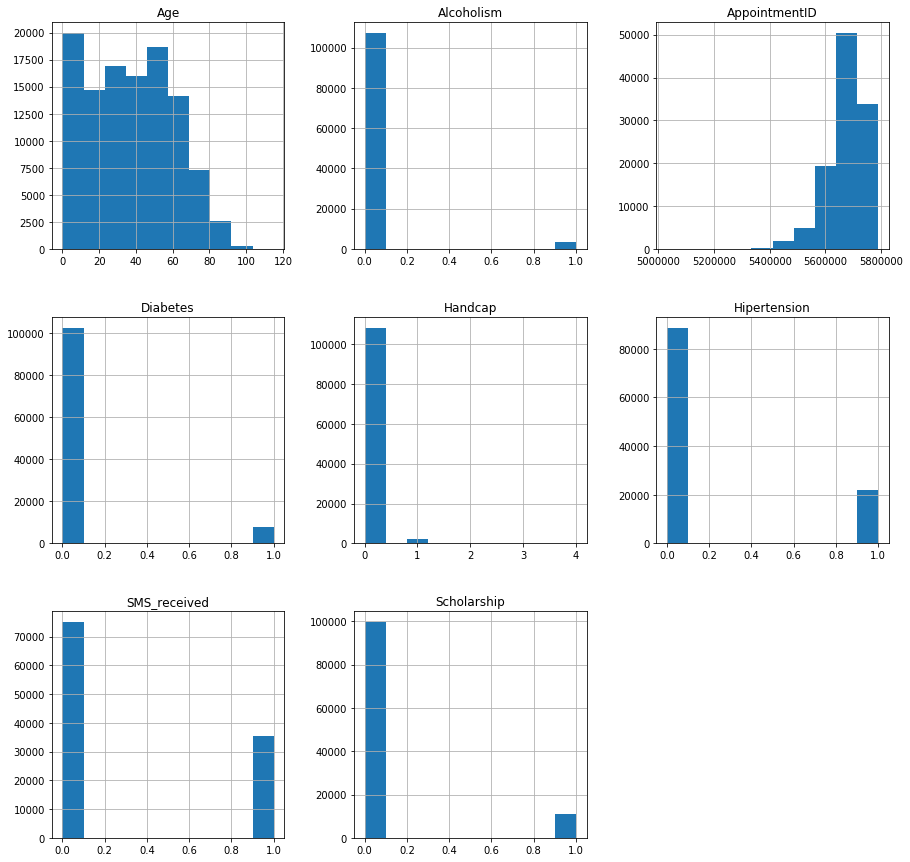

In [29]:
#plot histogram
df_showUp.hist(figsize=(15, 15));

Text(0, 0.5, 'Patient_Number')

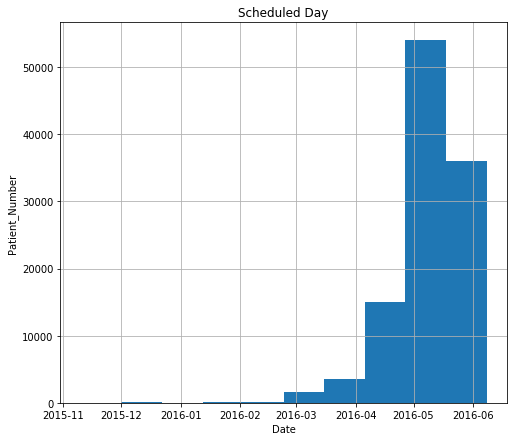

In [30]:
# Scheduled Day histogram
Splot = df_showUp['ScheduledDay'].hist(figsize=(8, 7));
plt.title('Scheduled Day')
Splot.set_xlabel('Date')
Splot.set_ylabel('Patient_Number')

Text(0, 0.5, 'Patient_Number')

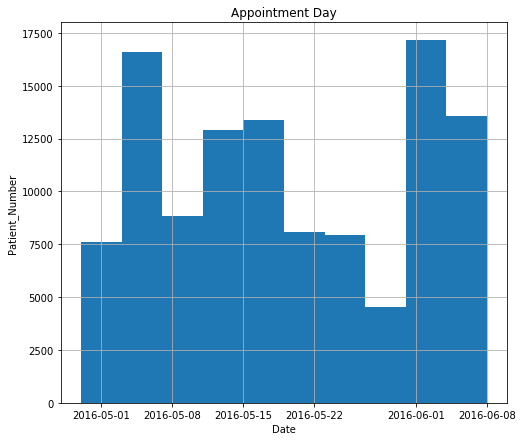

In [31]:
# Appointment Day histogram
Aplot = df_showUp['AppointmentDay'].hist(figsize=(8, 7));
plt.title('Appointment Day')
Aplot.set_xlabel('Date')
Aplot.set_ylabel('Patient_Number')

### Observation:

- The 'Age' hist seems that it's skewed to the right, and the ages are kind of well-distributed, where about 20,000 patients are under 10 years, and most patients are between 20-60 years, while few patients are older than 60.

- The 'Alcoholism' hist shows that most of the patients are not alcoholics, where about 105,000 patients are not alcoholics and less than 5,000 are alcoholics.

- The 'Diabetes' hist shows that most of the patients do not have diabetes, where about 100,000 patients do not have diabetes and less than 10,000 have diabetes.

- The 'Handcap' hist shows that most of the patients do not suffer from a handicap, where about 107,000 patients do not suffer from the handicap and less than 3,000 suffer from the handicap.

- The 'Hipertension' hist shows that most of the patients do not have Hypertension, where about 90,000 patients do not have Hypertension and less than  22,000 have Hypertension.

- The 'SMS_received' hist shows that most of the patients do not receive SMS regarding the appointment, where about 75,000 patients do not receive SMS, and less than 35,000 received it.

- The 'Scholarship' hist shows that most of the patients do not have a scholarship, where about 100,000 patients do not have scholarships and about 10,000 patients do have a scholarship.

- The ScheduledDay hist skwed to the left, Most of Scheduled made between March and June 2016.

- The AppointmentDay hist, made between Nov 2015 to June 2016

In [32]:
# Describe the Scheduled Day values
df_showUp['ScheduledDay'].describe()

count                  110526
unique                    111
top       2016-05-03 00:00:00
freq                     4238
first     2015-11-10 00:00:00
last      2016-06-08 00:00:00
Name: ScheduledDay, dtype: object

the 'Scheduled Day' started from 2015-11-10 and end in 2016-06-08

In [33]:
# Describe the Appointment Day values
df_showUp['AppointmentDay'].describe()

count                  110526
unique                     27
top       2016-06-06 00:00:00
freq                     4691
first     2016-04-29 00:00:00
last      2016-06-08 00:00:00
Name: AppointmentDay, dtype: object

the 'AppointmentDay' started from 2016-04-29 and end in 2016-06-08

Text(0.5, 1.0, '\nThe distribution of age')

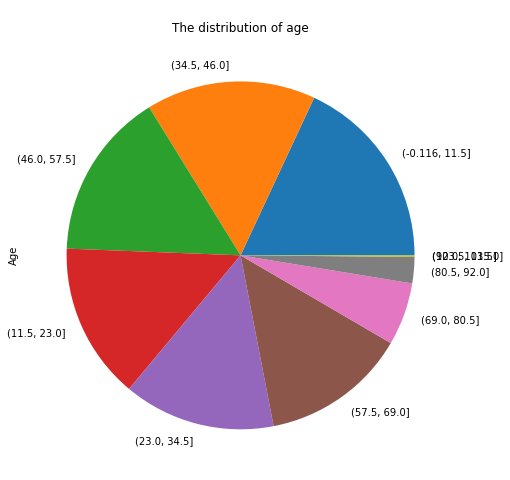

In [34]:
# plot the distribution of age
df_showUp['Age'].value_counts(bins=10).plot(kind='pie',figsize=(8,8))
plt.title("\nThe distribution of age")

Most patients are young.

Text(0.5, 1.0, '\nthe proportion of alcoholics and non-alcoholics')

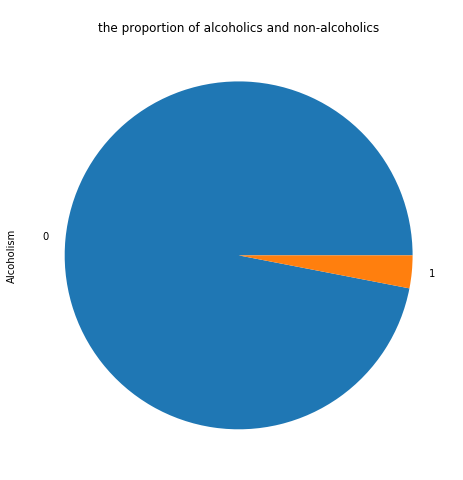

In [35]:
# plot for the proportion of alcoholics and non-alcoholics
df_showUp['Alcoholism'].value_counts().plot(kind='pie',figsize=(8,8))
plt.title("\nthe proportion of alcoholics and non-alcoholics")

Most patients are not alcoholics

Text(0.5, 1.0, '\nThe proportion of patients who suffer from diabetes and those who do not suffer from diabetes.')

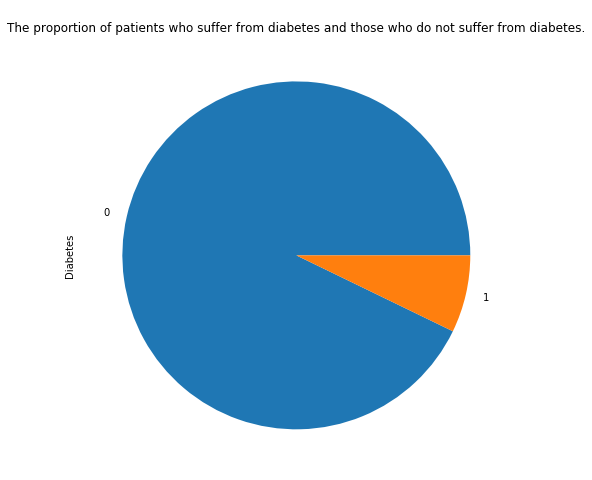

In [36]:
# plot fot the proportion of patients who suffer from diabetes and those who do not suffer from diabetes.
df_showUp['Diabetes'].value_counts().plot(kind='pie',figsize=(8,8))
plt.title("\nThe proportion of patients who suffer from diabetes and those who do not suffer from diabetes.")

Most patients do not suffer from diabetes.

Text(0.5, 1.0, '\nThe proportion of Handicap and non-Handicap')

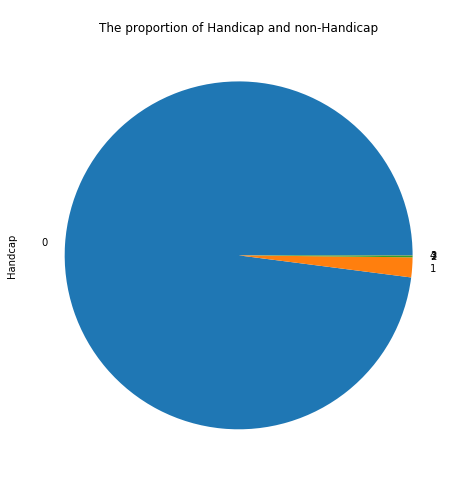

In [37]:
# plot for the proportion of Handicap and non-Handicap
df_showUp['Handcap'].value_counts().plot(kind='pie',figsize=(8,8))
plt.title("\nThe proportion of Handicap and non-Handicap")

Most of the patients do not suffer from a handicap.

Text(0.5, 1.0, '\n The proportion of Hipertension and non-Hipertension')

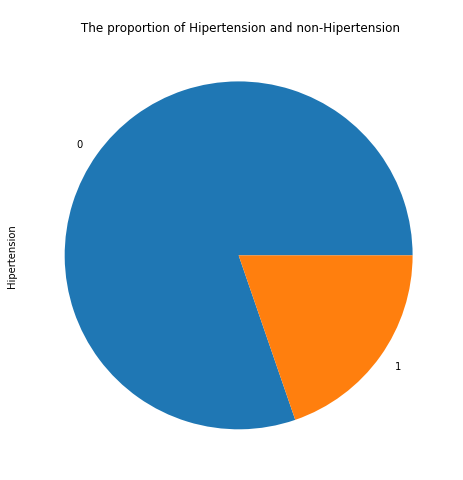

In [38]:
# plot for the proportion of Hipertension and non-Hipertension
df_showUp['Hipertension'].value_counts().plot(kind='pie',figsize=(8,8))
plt.title("\n The proportion of Hipertension and non-Hipertension")

Most of the patients do not have Hypertension.

Text(0.5, 1.0, '\n The proportion of receiving SMS and not receiving SMS')

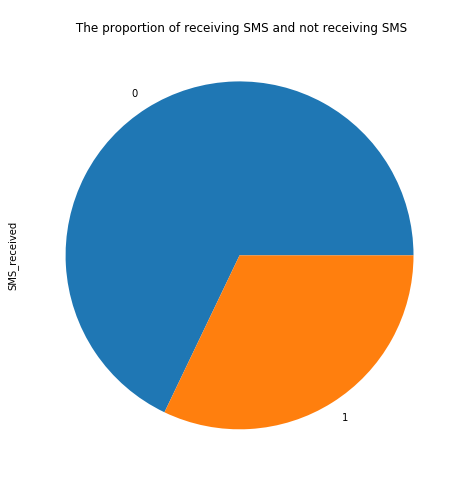

In [39]:
# plot for the proportion of receiving SMS and not receiving SMS
df_showUp['SMS_received'].value_counts().plot(kind='pie',figsize=(8,8))
plt.title("\n The proportion of receiving SMS and not receiving SMS")

Most of the patients do not received SMS regarding the appointment.

Text(0.5, 1.0, '\n The proportion of having Scholarship and not have Scholarship')

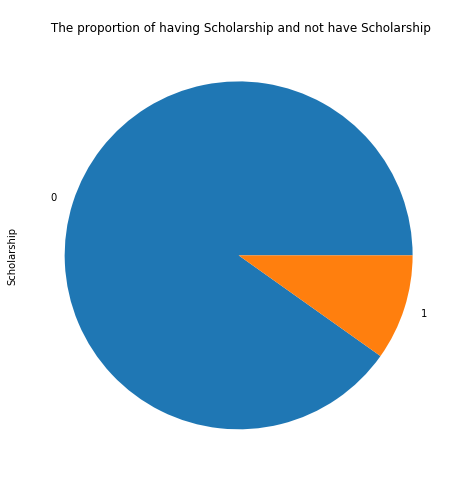

In [40]:
# plot for the proportion of having Scholarship and not have Scholarship
df_showUp['Scholarship'].value_counts().plot(kind='pie',figsize=(8,8))
plt.title("\n The proportion of having Scholarship and not have Scholarship")

Most of the patients do not have scholarship.

<a id='Questions'></a>  
### Questions
Based on the above Dataset analysis many questions need to be answered:

- How many patients missed their appointment?
- What's the gender that missed their appointment more?
- Is the SMS_received have a relation on affecting not show up rate?
- Does the waiting period affect the patient's show up?
- How many appointments are scheduled per day؟
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
- Is there more than one appointment for the same patient?

## What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### 1- How many patients missed their appointment?

110526
Yes    20.193439
Name: No-show, dtype: float64
No    79.806561
Name: No-show, dtype: float64


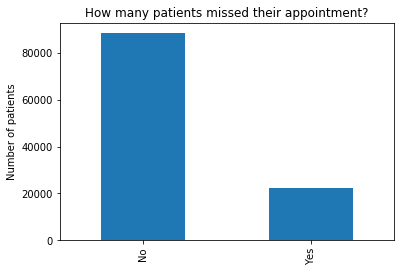

In [41]:
df_showUp['No-show'].value_counts().plot(kind='bar')
plt.title('How many patients missed their appointment?')
plt.ylabel('Number of patients')
total = len(df_showUp['No-show'])
print(total)
print((df_showUp[(df_showUp['No-show'] == "Yes")]['No-show'].value_counts()/total*100))
print((df_showUp[(df_showUp['No-show'] == "No")]['No-show'].value_counts()/total*100))


20% of the patients missed their appointment, while 80% of the patients attend thier appointment...

## 2- What's the gender that missed thier appointment more?

Gender
F    71839
M    38687
dtype: int64
No-show         No        Yes
Gender                       
F        51.793243  13.204133
M        28.013318   6.989306


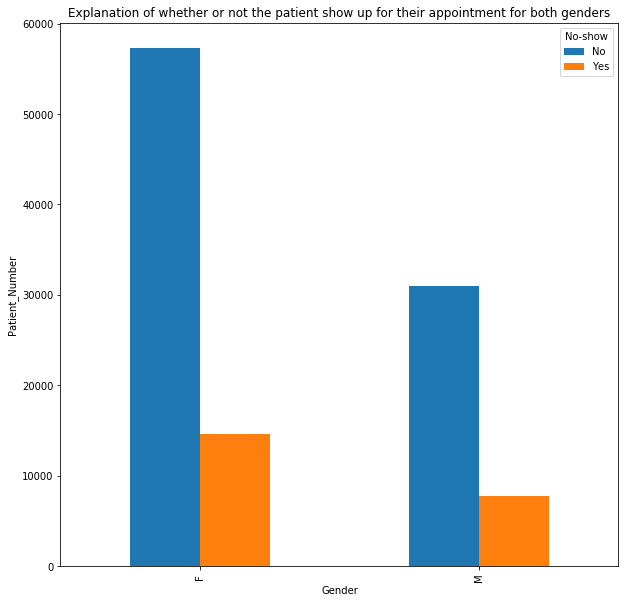

In [42]:
groups = df_showUp.groupby(['Gender','No-show']).size().unstack(fill_value=0)
G_plot = groups.plot.bar(figsize=(10,10))
plt.title('Explanation of whether or not the patient show up for their appointment for both genders')
G_plot.set_ylabel('Patient_Number')
total = len(df_showUp['No-show'])
print(df_showUp.groupby(['Gender']).size())
print(groups/total*100)

The number of Female patients is '71839' where 51% have attended the appointment while 13% missed their appointment.

The number of Male patients is '38687' where 28% have attended the appointment while 6% missed their appointment.

### 3- Is the SMS_received have a relation on affecting on not show up rate?

SMS_received
0    75044
1    35482
dtype: int64
No-show              No        Yes
SMS_received                      
0             56.555923  11.341223
1             23.250638   8.852216


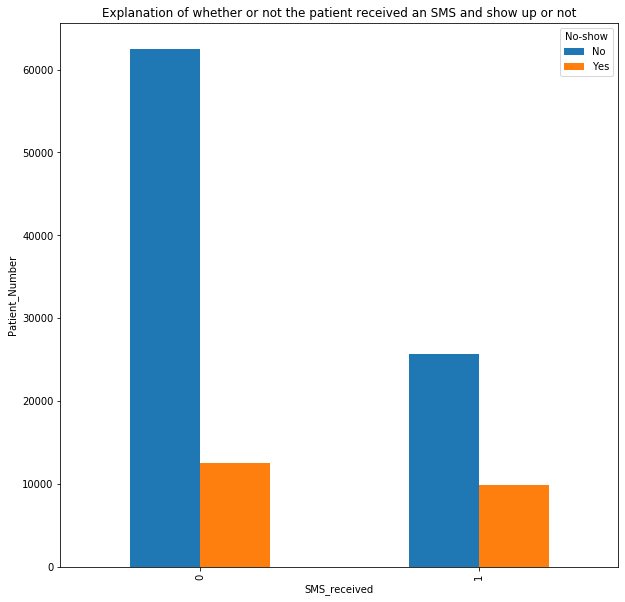

In [43]:
groups = df_showUp.groupby(['SMS_received','No-show']).size().unstack(fill_value=0)
S_plot = groups.plot.bar(figsize=(10,10))
plt.title('Explanation of whether or not the patient received an SMS and show up or not')
S_plot.set_ylabel('Patient_Number')
total = len(df_showUp['SMS_received'])
print(df_showUp.groupby(['SMS_received']).size())
print(groups/total*100)

The number of patients that recieved an SMS is '35482' where 23% have attended the appointment while 8% missed their appointment.

The number of patients that didn't recieved an SMS is '75044' where 56% have attended the appointment while 11% missed their appointment.

### 4- Does the waiting period affect the patient's show up?

In [44]:
#calculate the waiting period
df_showUp['WaitingPeriod'] =  (df_showUp['AppointmentDay'] - df_showUp['ScheduledDay']).dt.days.astype('int64')
df_showUp.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingPeriod
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [45]:
#check for the DataType of WaitingPeriod
df_showUp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  object        
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  No-show         110526 non-null  object        
 14  WaitingPeriod   110526 non-null  int

In [46]:
#check the unique values to explore the wrong value.
df_showUp['WaitingPeriod'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

There some Waiting period < 0 we need to remove these records.

In [47]:
#check to ensure that no more error in WaitingPeriod feature
df_showUp[df_showUp['WaitingPeriod'] < 0]['WaitingPeriod'].value_counts()

-1    4
-6    1
Name: WaitingPeriod, dtype: int64

In [48]:
#reomve records with waiting time < 0
df_showUp.drop(df_showUp[df_showUp['WaitingPeriod'] < 0].index, axis=0, inplace=True)

In [49]:
#check for the issue of fixed or not
df_showUp[df_showUp['WaitingPeriod'] < 0]['WaitingPeriod'].value_counts()

Series([], Name: WaitingPeriod, dtype: int64)

In [50]:
# Describe the WaitingPeriod values
df_showUp['WaitingPeriod'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingPeriod, dtype: float64

It seems that the average the waiting period is 10, where the min is 0 days, and 75% is 15 days while the max is 179 days

Text(0.5, 0, 'Waiting_Period')

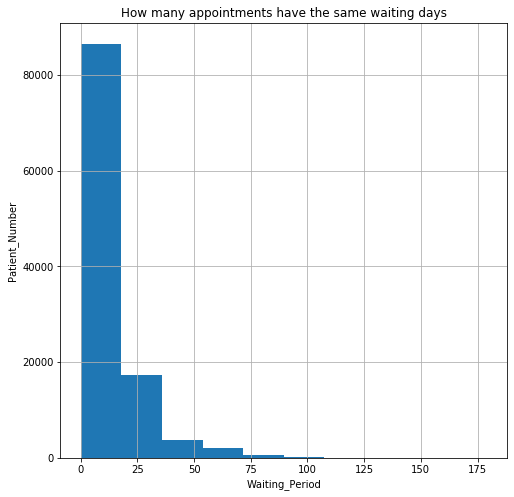

In [51]:
# bar plot for How many appointments have the same waiting days 
W_plot = df_showUp['WaitingPeriod'].hist(figsize=(8,8))
plt.title('How many appointments have the same waiting days')
W_plot.set_ylabel('Patient_Number')
W_plot.set_xlabel('Waiting_Period')

The WaitingDays hist skwed to the right.

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
101        1
132        1
151        1
146        1
127        1
Name: WaitingPeriod, Length: 129, dtype: int64


Text(0.5, 0, 'Waiting_Period')

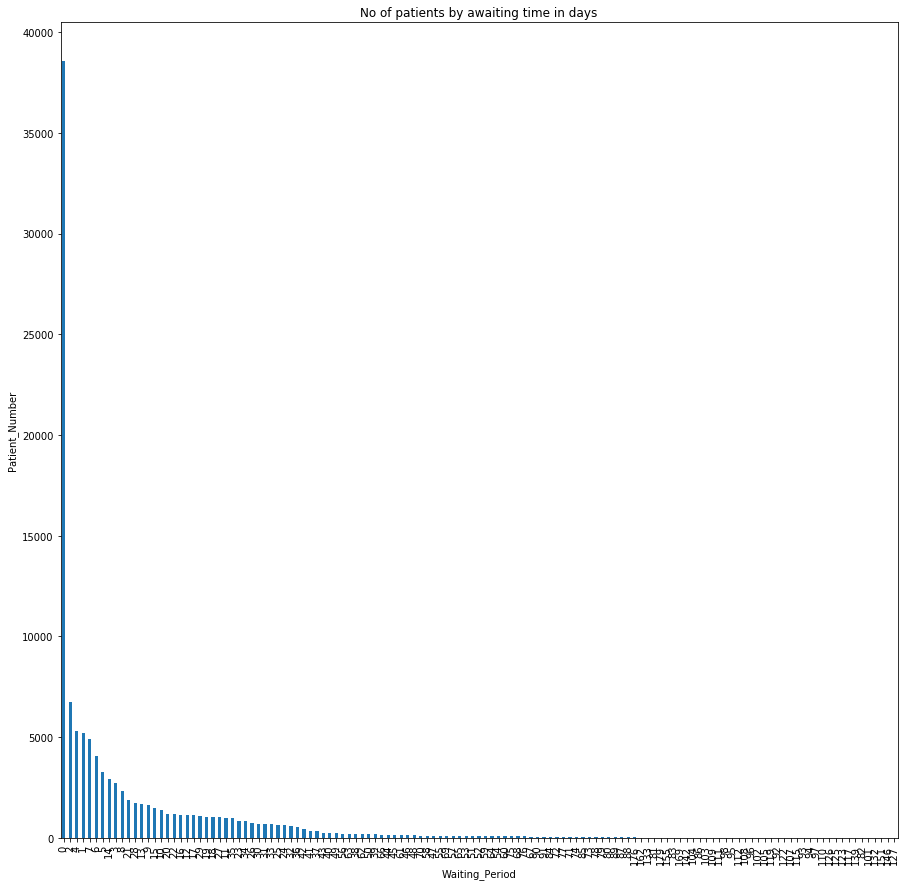

In [52]:
#plot for No of patients by awaiting time in days
W_count = df_showUp['WaitingPeriod'].value_counts()
W_countP = W_count.plot.bar(figsize=(15,15))
print(W_count)
plt.title("No of patients by awaiting time in days")
W_countP.set_ylabel('Patient_Number')
W_countP.set_xlabel('Waiting_Period')

There is a large conglomeration of appointments in the first days and scarcity of appointments in the latest days, were waiting period for 0 days having 38562 appointments and And it begins to decrease more in the last days to reach one appointment per day.

WaitingPeriod
0      38562
1       5213
2       6725
3       2737
4       5290
       ...  
155       10
162       11
169        8
176       16
179       10
Length: 129, dtype: int64
No-show          No    Yes
SMS_received              
0             62509  12535
1             25698   9784


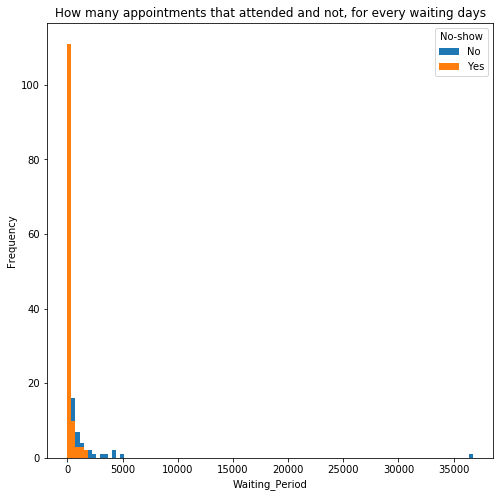

In [53]:
#plot for How many appointments that attended and not, for every waiting days
W_groups = df_showUp.groupby(['WaitingPeriod','No-show']).size().unstack(fill_value=0).plot.hist(bins=100,figsize=(8,8))
plt.title("How many appointments that attended and not, for every waiting days")
W_groups.set_xlabel('Waiting_Period')
total = len(df_showUp['No-show'])
print(df_showUp.groupby(['WaitingPeriod']).size())
print(groups)

Out of 38,562 patients, there were 1792 patients about 5% who did not show up.

### 5- How many appointments are scheduled per day

In [54]:
#check for the day_name of ScheduledDay
df_showUp['SDays'] = df_showUp['ScheduledDay'].dt.day_name()
#count how many appointments per Day of week
df_showUp['SDays'].value_counts()

Tuesday      26167
Wednesday    24259
Monday       23084
Friday       18915
Thursday     18072
Saturday        24
Name: SDays, dtype: int64

the appointments for the (Monday, Tuesday, Wednesday) days they kind of equals in distributed while (Friday, Thursday) days they a little bit less than the days before, "Saturday"​ with 24 appointments and no appointment for Sunday.

Text(0, 0.5, 'appointment_number')

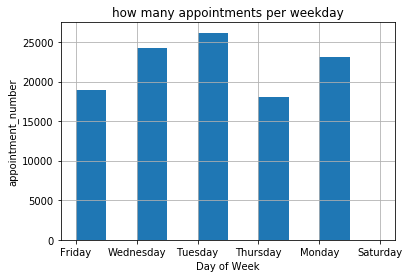

In [55]:
#plot for the distribution of appointments per day of week
SDays_plot = df_showUp['SDays'].hist()
plt.title("how many appointments per weekday")
SDays_plot.set_xlabel('Day of Week')
SDays_plot.set_ylabel('appointment_number')

The distribution of appointments among the weekday is considered kind of well-distributed except 'Saturday'.

### 6- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [56]:
P_Features = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received','SDays']
for i, feature in enumerate(P_Features):
    total = len(df_showUp[feature])
    size = df_showUp.groupby([feature, 'No-show']).size()
    print(size/total*100)

Scholarship  No-show
0            No         72.315669
             Yes        17.857240
1            No          7.494503
             Yes         2.332588
dtype: float64
Hipertension  No-show
0             No         63.497435
              Yes        16.776902
1             No         16.312737
              Yes         3.412926
dtype: float64
Diabetes  No-show
0         No         73.917174
          Yes        18.895956
1         No          5.892998
          Yes         1.293872
dtype: float64
Alcoholism  No-show
0           No         77.382579
            Yes        19.577275
1           No          2.427593
            Yes         0.612553
dtype: float64
Handcap  No-show
0        No         78.150759
         Yes        19.823382
1        No          1.516454
         Yes         0.329349
2        No          0.132102
         Yes         0.033478
3        No          0.009048
         Yes         0.002714
4        No          0.001810
         Yes         0.000905
dtype: flo

It seems that from 15 to 20% are the patients no-show up from all categories.

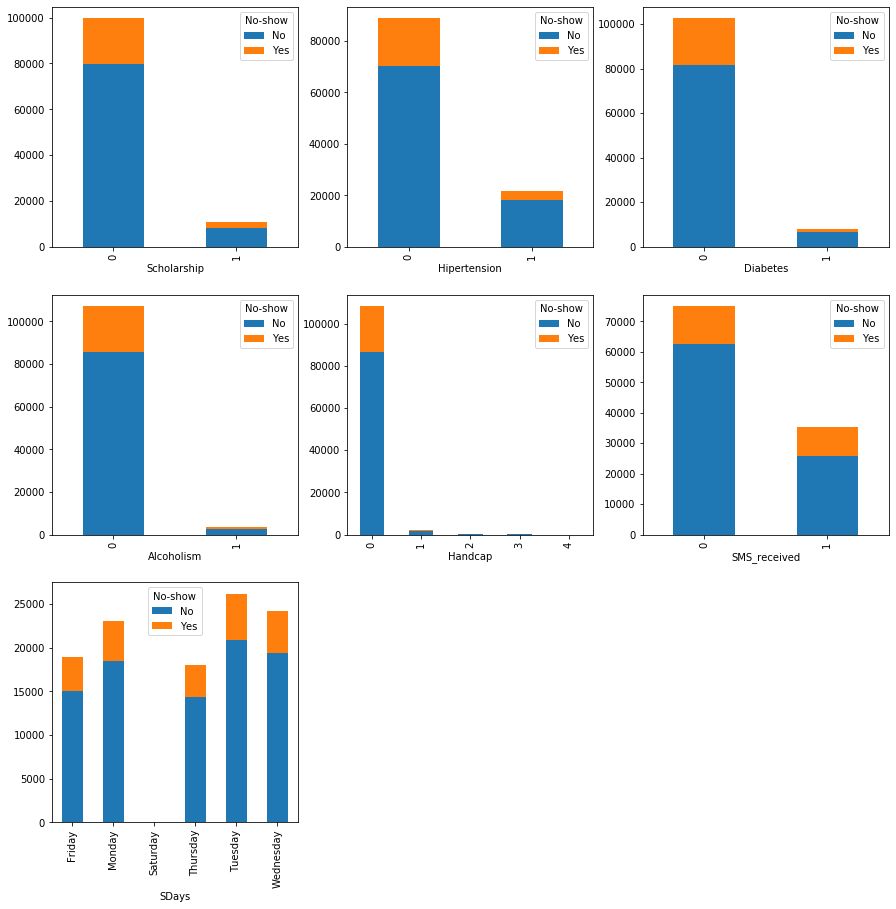

In [57]:
P_Feature = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received','SDays']
plot = plt.figure(figsize=(15, 15))
for i, feature in enumerate(P_Features):
    ax = plot.add_subplot(3, 3, i+1)
    total = len(df_showUp[feature])
    groups = df_showUp.groupby([feature, 'No-show'])[feature].count().unstack('No-show').plot(ax=ax, kind='bar', stacked=True)

This bar chart confirms that the number of patients that didn't show up in their scheduled appointment is 20%.

### 7- Is there more than one appointment for the same patient?

In [58]:
# how many appointments for a single patient
df_showUp['PatientId'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
                   ..
79327417418112      1
968374793735151     1
382568611531        1
58261142256755      1
2323294785123       1
Name: PatientId, Length: 62298, dtype: int64

There are multiple appointments for the same patients, where the number of appointments for the top 5 patients ranges from 88 to 62 appointments, Taking into consideration, that the time range of visits appointed spans over 2 months, an appointment is most likely each examination or each specialist visit.

<a id='conclusions'></a>
## Conclusions


I have worked with the dataset and fixed a few problems like, removing wrong data, fixed the datatype of the data, adding new features based on existing data. I have also investigated most of the patient features in the dataset and made a few observations comparing them to the  (no_show). 

-	the 'Scheduled Day' started on 2015-11-10 and end on 2016-06-08 .
-	the 'AppointmentDay' started on 2016-04-29 and end on 2016-06-08 .
-	the appointments for the (Monday, Tuesday, Wednesday) days they kind of equals in distributed while (Friday, Thursday) days they a little bit less than the days before, "Saturday" with 24 appointments and no appointment for Sunday.
-	The average the waiting period is 10, where the min is 0 days, and 75% is 15 days while the max is 179 days
-	The top number of patients that scheduled their appointments on the same days is 40,000 patients.
-	Out of 38,562 patients, there were 1792 patients about 5% who did not show up.
-	There are many young patients but in general, the patient's age is well-distributed and the number of patients goes drastically down for patients older than 60 years.
-	The Average Age of patients is 37, while the min patients age is 0 'infants',  25% of patients are 18 years old 'teenagers', 75% of patients are 55 years old and the max is about 115.
-	Most of the patients are not alcoholics.
-	Most of the patients are not diabetes but more than alcoholics.
-	There are four handicapped categories with most of the people not being handicapped.
-	Most patients do not suffer from hypertension.
-	On average, 20% of appointments were missed.
-	Out of 71839 appointments made by females, 13% of females were missed their appointment.
-	Out of 38687 appointments made by the male, 6% of the male were missed their appointment.
-	There are multiple appointments for the same patients, where the number of appointments for the top 5 patients ranges from 88 to 62 appointments, Taking into consideration, that the time range of visits appointed spans over 2 months, an appointment is most likely each examination or each specialist visit.
-	The bar chart of the patient's feature confirms that the number of patients that didn't show up in their scheduled appointment is 20%.
-	The average the waiting period is 10, where the min is 0 days, and 75% is 15 days while the max is 179 days
